# Electric Vehicle Sales by State in India — Data Analysis and Visualization

### 1. IMPORTING LIBRARIES ---

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### 2. READING DATASET ---

In [6]:
# Import dataset into Python using pandas: 
df = pd.read_csv("EV_Dataset.csv")

df.head(11)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0
7,2014.0,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
8,2014.0,jan,1/1/2014,Andhra Pradesh,EXCAVATOR (COMMERCIAL),Others,Others,0.0
9,2014.0,jan,1/1/2014,Andhra Pradesh,FORK LIFT,Others,Others,0.0


### 3. DATA CLEANING AND PROCESSING --

In [13]:
# To get the number of rows and columns --
df.shape

(96845, 8)

#### a) Information of the type of data --

In [12]:
# Info about the dataset --
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


#### b) Finding out the number of null values --

In [16]:
# Any missing value --
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

#### c) Finding Out any duplicate value --

In [18]:
# Any Duplicate values --
df.duplicated().sum()

np.int64(0)

#### d) Converting the data types --

In [22]:
# changing the datatype of Year column
df['Year'] = df['Year'].astype(int)

# changing the datatype of Date column
df["Date"] = pd.to_datetime(df["Date"],errors='coerce')

df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


### 4. Exploratory Data Analysis (EDA)

#### a) Yearly EV Sales Trends --

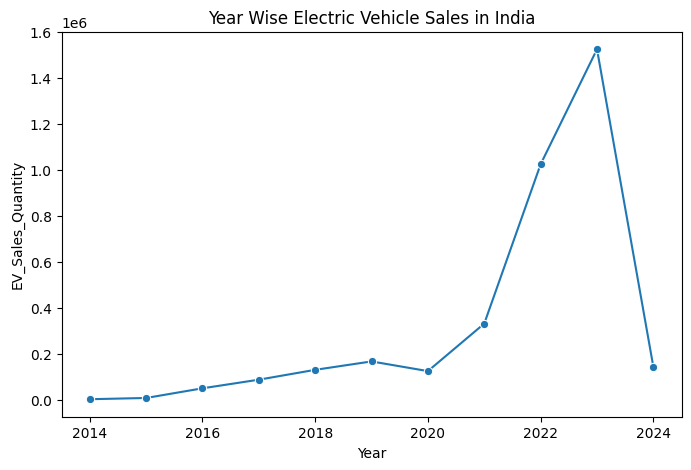

In [31]:
yearly_sales = df.groupby('Year')["EV_Sales_Quantity"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y = "EV_Sales_Quantity", data=yearly_sales,marker="o")
plt.title("Year Wise Electric Vehicle Sales in India")
plt.show()

#### b) Monthly EV sales Trends --

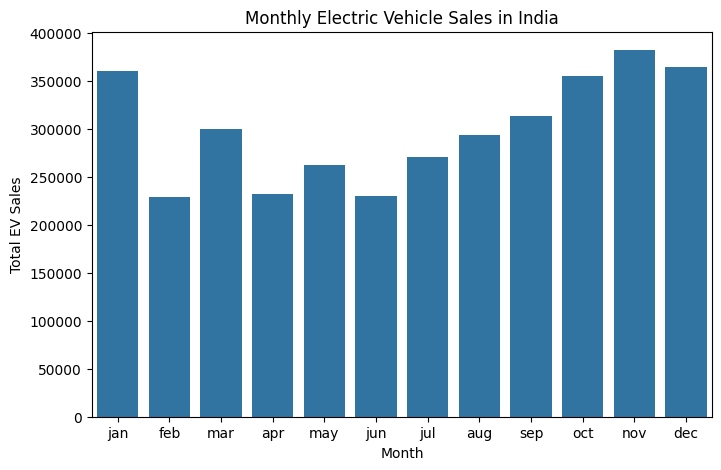

In [45]:
monthly_sales = df.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Month_Name', y='EV_Sales_Quantity', data=monthly_sales,
            order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title('Monthly Electric Vehicle Sales in India')
plt.xlabel('Month')
plt.ylabel('Total EV Sales')
plt.show()

#### c) State-wise EV Sales Analysis--

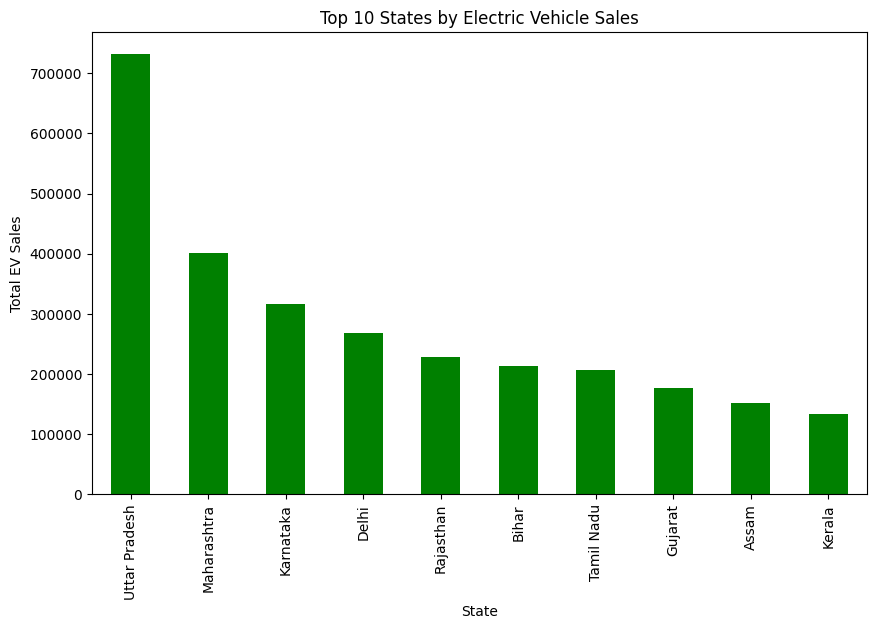

In [46]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
state_sales.plot(kind='bar', color='green')
plt.title('Top 10 States by Electric Vehicle Sales')
plt.xlabel('State')
plt.ylabel('Total EV Sales')
plt.show()

#### d) EV Sales by Vehicle Category--

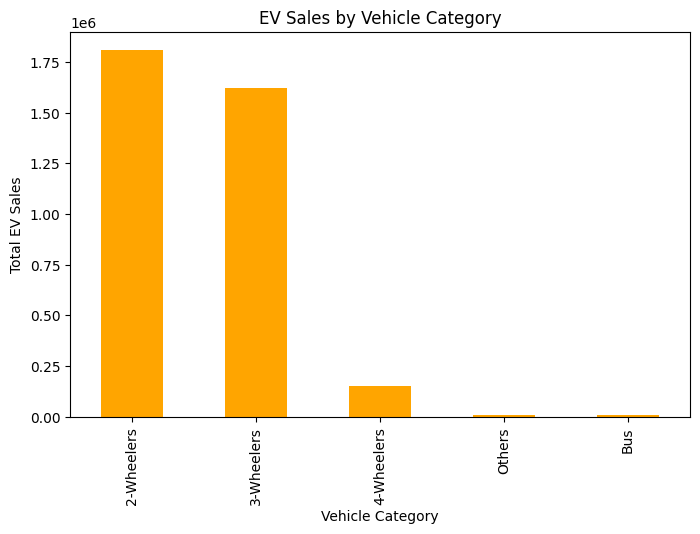

In [47]:
category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='orange')
plt.title('EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total EV Sales')
plt.show()

#### e) EV Sales by Vehicle Type--

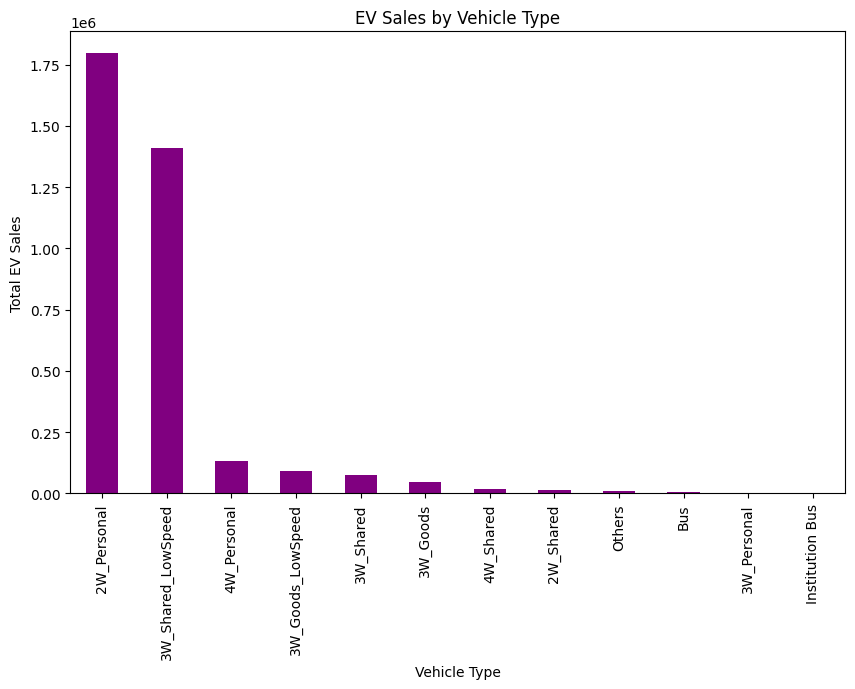

In [48]:
type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
type_sales.plot(kind='bar', color='purple')
plt.title('EV Sales by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total EV Sales')
plt.show()

#### f) Monthly Trends for Top States--

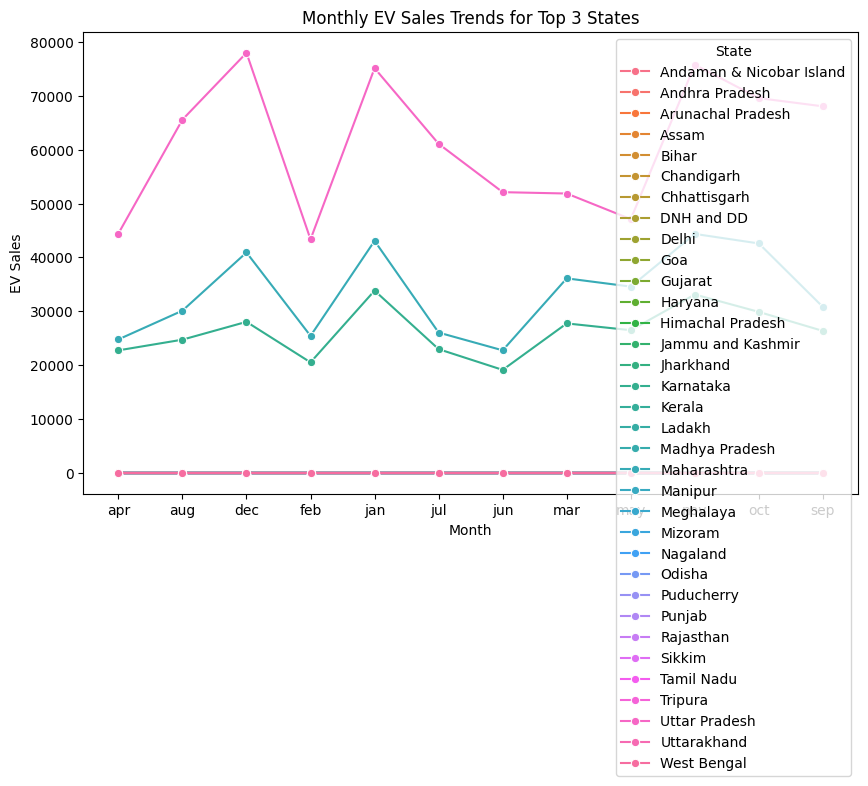

In [49]:
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(3).index

monthly_state_sales = df[df['State'].isin(top_states)].groupby(['Month_Name','State'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_state_sales,
    x='Month_Name',
    y='EV_Sales_Quantity',
    hue='State',
    marker='o')
plt.title('Monthly EV Sales Trends for Top 3 States')
plt.xlabel('Month')
plt.ylabel('EV Sales')
plt.show()

#### g) States vs Vehicle Types--

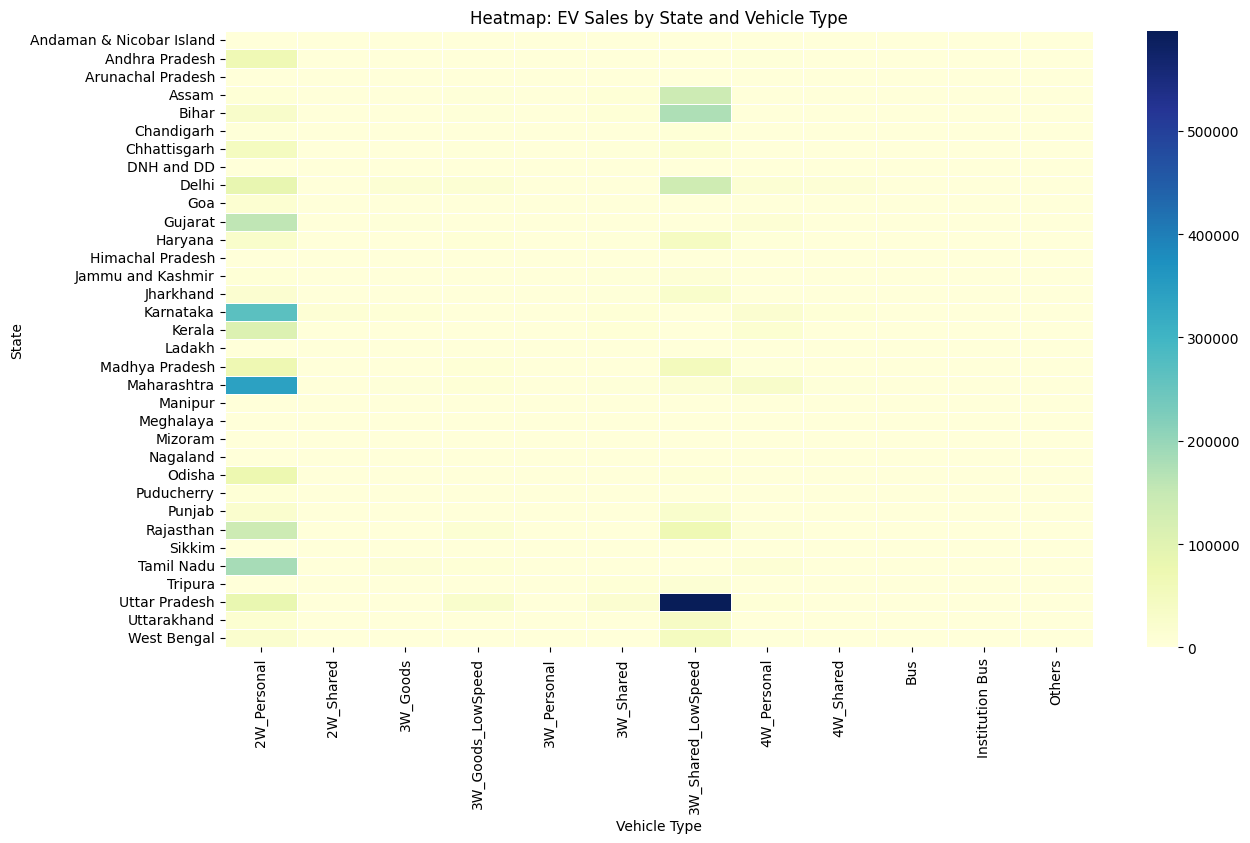

In [50]:
heatmap_data = df.groupby(['State','Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: EV Sales by State and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('State')
plt.show()

#### h) Top Vehicle Classes in a Specific State--

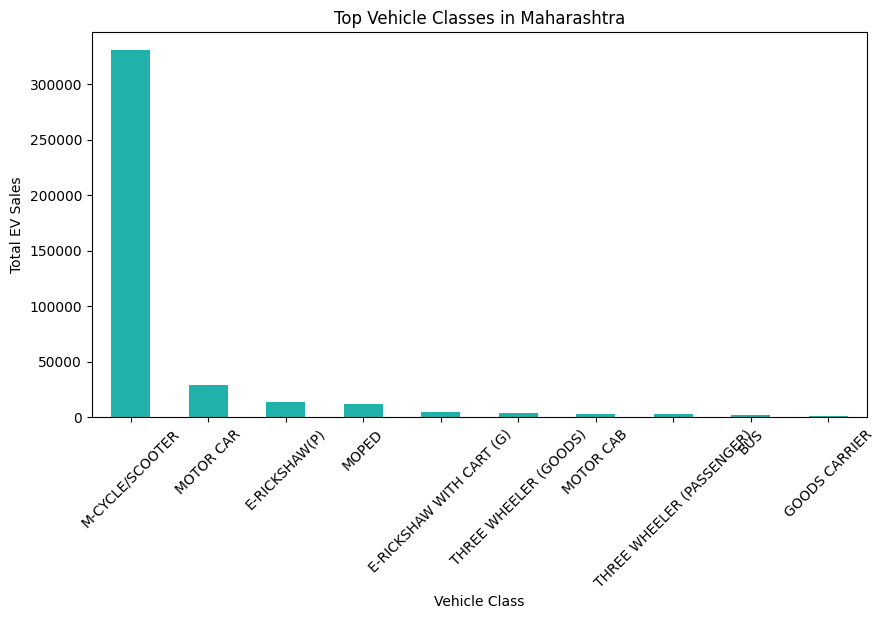

In [51]:
state_df = df[df['State'] == 'Maharashtra']

top_vehicle_classes = state_df.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_vehicle_classes.plot(kind='bar', color='lightseagreen')
plt.title('Top Vehicle Classes in Maharashtra')
plt.xlabel('Vehicle Class')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45)
plt.show()

### Summary

- EV sales have consistently increased from 2014 to 2023, showing strong adoption across India.
- Sales are relatively higher in months like March, September, and December, possibly aligning with fiscal year-end or festive purchases.
- Maharashtra, Karnataka, and Uttar Pradesh lead the country in EV adoption.
- Two-wheelers dominate the EV market, making up the largest share.
- Uttar Pradesh shows seasonal spikes, indicating demand is not consistent throughout the year.
- Goods carriers and buses have minor contribution in that state.

------------------------------------------------------------------------------------------------------------------------------------

### “I analyzed EV sales data to identify state-level trends, vehicle type popularity, and yearly growth. I discovered that two-wheelers are the dominant segment, with Maharashtra leading in sales. I recommended focusing infrastructure investments on high-adoption regions.”


-------------------------------------------------------------------------------------------------------------------------------